# Linear Regression

In [42]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [43]:
cars=pd.read_csv("/home/shyam/Documents/Data Science/Data-Science-master/datasets/cars.csv") # import data

In [44]:
cars.head()   # first five

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [45]:
cars.shape  # dimensions

(32, 12)

In [46]:
cars.isnull().sum()   #  Exploratory data analysis  and cleaning process

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [47]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_model    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [48]:
#cars=cars.fillna(cars.mean()) for replacing null values

In [49]:
#cars.isnull().sum()

In [50]:
print('Percent of missing "hp" records is %.2f%%' %((cars['hp'].isnull().sum()/cars.shape[0])*100))

Percent of missing "hp" records is 0.00%


import seaborn as sns
df_corr = someDataFrame.corr()
ax = sns.heatmap(df_corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
### for changes in plot cutoff bottom or top

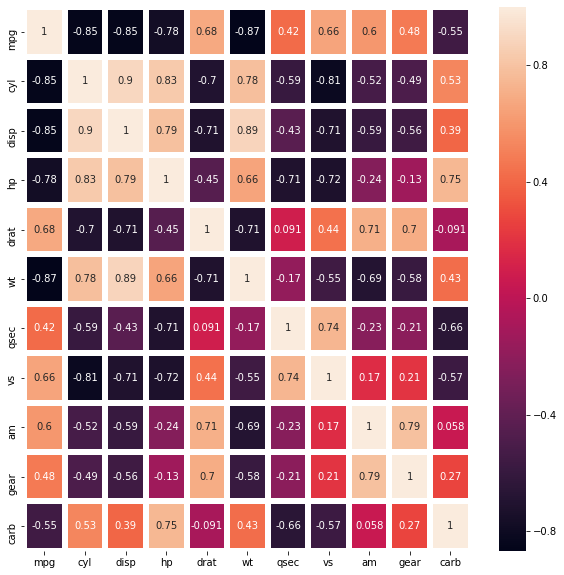

In [51]:
plt.figure(figsize=(10,10)) 
sb.heatmap(cars.corr() , linewidths=5 , annot=True)


In [52]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [53]:
# x and y values
X=cars.iloc[:,[4,6,7,8,9]].values
y= cars.iloc[:,1].values

In [54]:
X

array([[110.   ,   2.62 ,  16.46 ,   0.   ,   1.   ],
       [110.   ,   2.875,  17.02 ,   0.   ,   1.   ],
       [ 93.   ,   2.32 ,  18.61 ,   1.   ,   1.   ],
       [110.   ,   3.215,  19.44 ,   1.   ,   0.   ],
       [175.   ,   3.44 ,  17.02 ,   0.   ,   0.   ],
       [105.   ,   3.46 ,  20.22 ,   1.   ,   0.   ],
       [245.   ,   3.57 ,  15.84 ,   0.   ,   0.   ],
       [ 62.   ,   3.19 ,  20.   ,   1.   ,   0.   ],
       [ 95.   ,   3.15 ,  22.9  ,   1.   ,   0.   ],
       [123.   ,   3.44 ,  18.3  ,   1.   ,   0.   ],
       [123.   ,   3.44 ,  18.9  ,   1.   ,   0.   ],
       [180.   ,   4.07 ,  17.4  ,   0.   ,   0.   ],
       [180.   ,   3.73 ,  17.6  ,   0.   ,   0.   ],
       [180.   ,   3.78 ,  18.   ,   0.   ,   0.   ],
       [205.   ,   5.25 ,  17.98 ,   0.   ,   0.   ],
       [215.   ,   5.424,  17.82 ,   0.   ,   0.   ],
       [230.   ,   5.345,  17.42 ,   0.   ,   0.   ],
       [ 66.   ,   2.2  ,  19.47 ,   1.   ,   1.   ],
       [ 52.   ,   1.615,  1

In [55]:
y

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [56]:
from sklearn.model_selection import train_test_split  #  library for training and testing process

In [57]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.30 , random_state=12) # by default 70 for train and 30 for test 

In [58]:
from sklearn.linear_model import LinearRegression # to import library for model

In [59]:
model_lr= LinearRegression()   # adding the model

In [60]:
results=model_lr.fit(X_train,y_train)  # fitting the model

In [61]:
# predictions
y_predict=model_lr.predict(X_test)

In [62]:
from sklearn.metrics import r2_score 


In [63]:
r2_score(y_test, y_predict)

0.8901579350569321

In [64]:
y_test

array([24.4, 19.2, 30.4, 10.4, 21. , 13.3, 18.7, 10.4, 27.3, 19.2])

In [65]:
y_predict

array([21.5464909 , 15.06973255, 28.99325406, 11.83507105, 23.32009486,
       12.22252765, 16.11981385, 11.04090211, 28.32291539, 18.09619097])

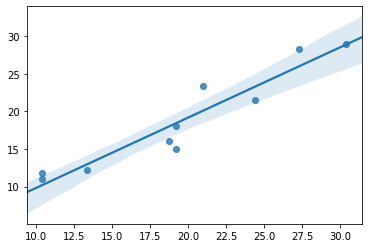

In [66]:
sb.regplot(y_test, y_predict)

In [67]:
model_lr.coef_

array([-0.01582159, -2.67197369,  1.06893483, -0.2145824 ,  4.6622122 ])

In [68]:
model_lr.intercept_

9.88691168608725

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
print("MAE", mean_absolute_error(y_test, y_predict))
print("MSE", mean_squared_error(y_test,  y_predict))
print("RMSE", np.sqrt(mean_squared_error(y_test,  y_predict)))

MAE 1.85709734172627
MSE 4.511663959678066
RMSE 2.124067786036516


In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [72]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)
y_polytest_pred=model.predict(polynomial_features.fit_transform(X_test))

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)

rmse_test = np.sqrt(mean_squared_error(y_test,y_polytest_pred))
r2_test = r2_score(y_test,y_polytest_pred)
print(rmse)
print(r2)
print(rmse_test)
print(r2_test)

2.3962996367785423
0.8218095987566334
2.124067786036518
0.8901579350569319


x_poly.astype(int)

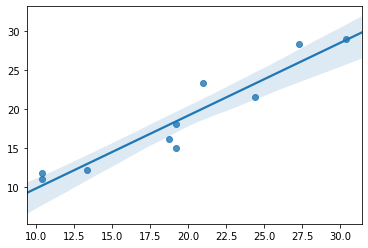

In [73]:
sb.regplot(y_test,y_polytest_pred)

In [74]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)
y_polytest_pred=model.predict(polynomial_features.fit_transform(X_test))

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)


print(rmse)
print(r2)


0.6413563594406354
0.987235586262252


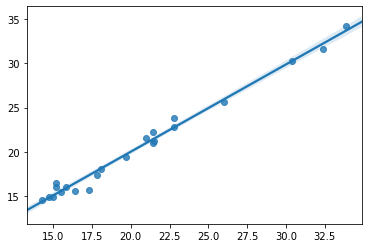

In [75]:
sb.regplot(y_train,y_poly_pred)

skew of hp 0.7614356361333623
skew of wt 0.44378553550607736
 kurtosis 0.05223272840399584
 kurtosis 0.1724705401587343


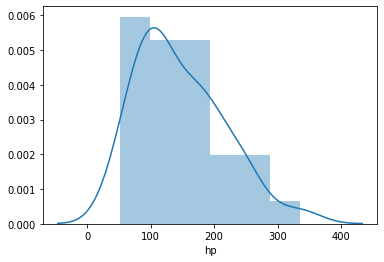

In [76]:
from scipy import stats
sb.distplot(cars.hp)

print("skew of hp", stats.skew(cars.hp))
print("skew of wt", stats.skew(cars.wt))

print(" kurtosis", stats.kurtosis(cars.hp))
print(" kurtosis", stats.kurtosis(cars.wt))

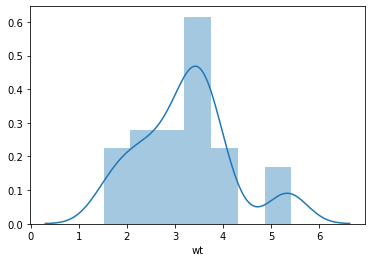

In [77]:
sb.distplot(cars.wt)

In [78]:
#For your new values
model_lr.predict([[110,2.3,16.5,1.,0.]])

array([19.42383903])